<a href="https://colab.research.google.com/github/ssjombo/ACU/blob/main/Copy_of_gedi_l1b_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GEDI L1B Data Processing Script
Author: Savannah Cooley

Repository: https://github.com/savcooley/full_waveform_lidar_training.git

---



In [ ]:
# 1. Clone the GitHub Repository
# To access the notebook and any supplementary files, clone the repository into your Colab environment by runing the following command:
!git clone https://github.com/savcooley/full_waveform_lidar_training.git

fatal: destination path 'full_waveform_lidar_training' already exists and is not an empty directory.


In [ ]:
# 2.  Install Required Libraries
# Install the necessary Python libraries using pip.
!pip install earthaccess h5py geopandas matplotlib seaborn requests shapely folium
!pip install --upgrade earthaccess

# Import libraries
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import folium
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
import earthaccess

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
# 3. Mount Your Google Drive
# Mounting your Google Drive allows the notebook to save output files and access data you may have stored. You will be prompted to authorize Colab to access your drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Enter your Earthdata Login username: simbarashejombo@gmail.com
Enter your Earthdata password: ··········
✓ Successfully authenticated with NASA Earthdata!
Area of Interest (Bounding Box): [-87.41, 34.24, -87.35, 34.28]
Longitude range: -87.41 to -87.35
Latitude range: 34.24 to 34.28
🎯 Using default AOI - will prioritize 5th granule for demo efficiency
Temporal range: 2019-04-01 to 2025-10-22
Processing Full Power beams only: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

🔍 Searching for GEDI L1B granules...
Searching for GEDI L1B data...
  Bounding box: [-87.41, 34.24, -87.35, 34.28]
  Date range: 2019-04-01 to 2025-10-22
  Max results: 20
Found 20 GEDI L1B granules

📋 Found granules:
  1. GEDI01_B_2019111192847_O02018_03_T04473_02_005_01_V002
  2. GEDI01_B_2019170125300_O02930_02_T05111_02_005_01_V002
  3. GEDI01_B_2019263001316_O04365_02_T03688_02_005_01_V002
  4. GEDI01_B_2019298172214_O04919_03_T01627_02_005_01_V002
  5. GEDI01_B_2019338181324_O05540_02_T00842_02_005_01_V002 (← 

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Downloaded: GEDI01_B_2019338181324_O05540_02_T00842_02_005_01_V002.h5 (4.19 GB)

📊 Processing GEDI L1B data...

Opening GEDI file: GEDI01_B_2019338181324_O05540_02_T00842_02_005_01_V002.h5
Available beams: ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
Full Power beams found: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

  Processing BEAM0101...
    Total shots in beam: 167346
    Shots in AOI: 52
    ✓ Extracted 52 shots from BEAM0101

  Processing BEAM0110...
    Total shots in beam: 166909
    Shots in AOI: 74
    ✓ Extracted 74 shots from BEAM0110

  Processing BEAM1000...
    Total shots in beam: 166811
    Shots in AOI: 96
    ✓ Extracted 96 shots from BEAM1000

  Processing BEAM1011...
    Total shots in beam: 167020
    Shots in AOI: 113
    ✓ Extracted 113 shots from BEAM1011

Applying quality filters...
  Criteria: degrade_flag = 0, stale_return_flag = 0
  BEAM0101: 52 → 52 shots (100.0% retained)
  BEAM0110: 74 → 74 sho

<Figure size 1600x1000 with 0 Axes>

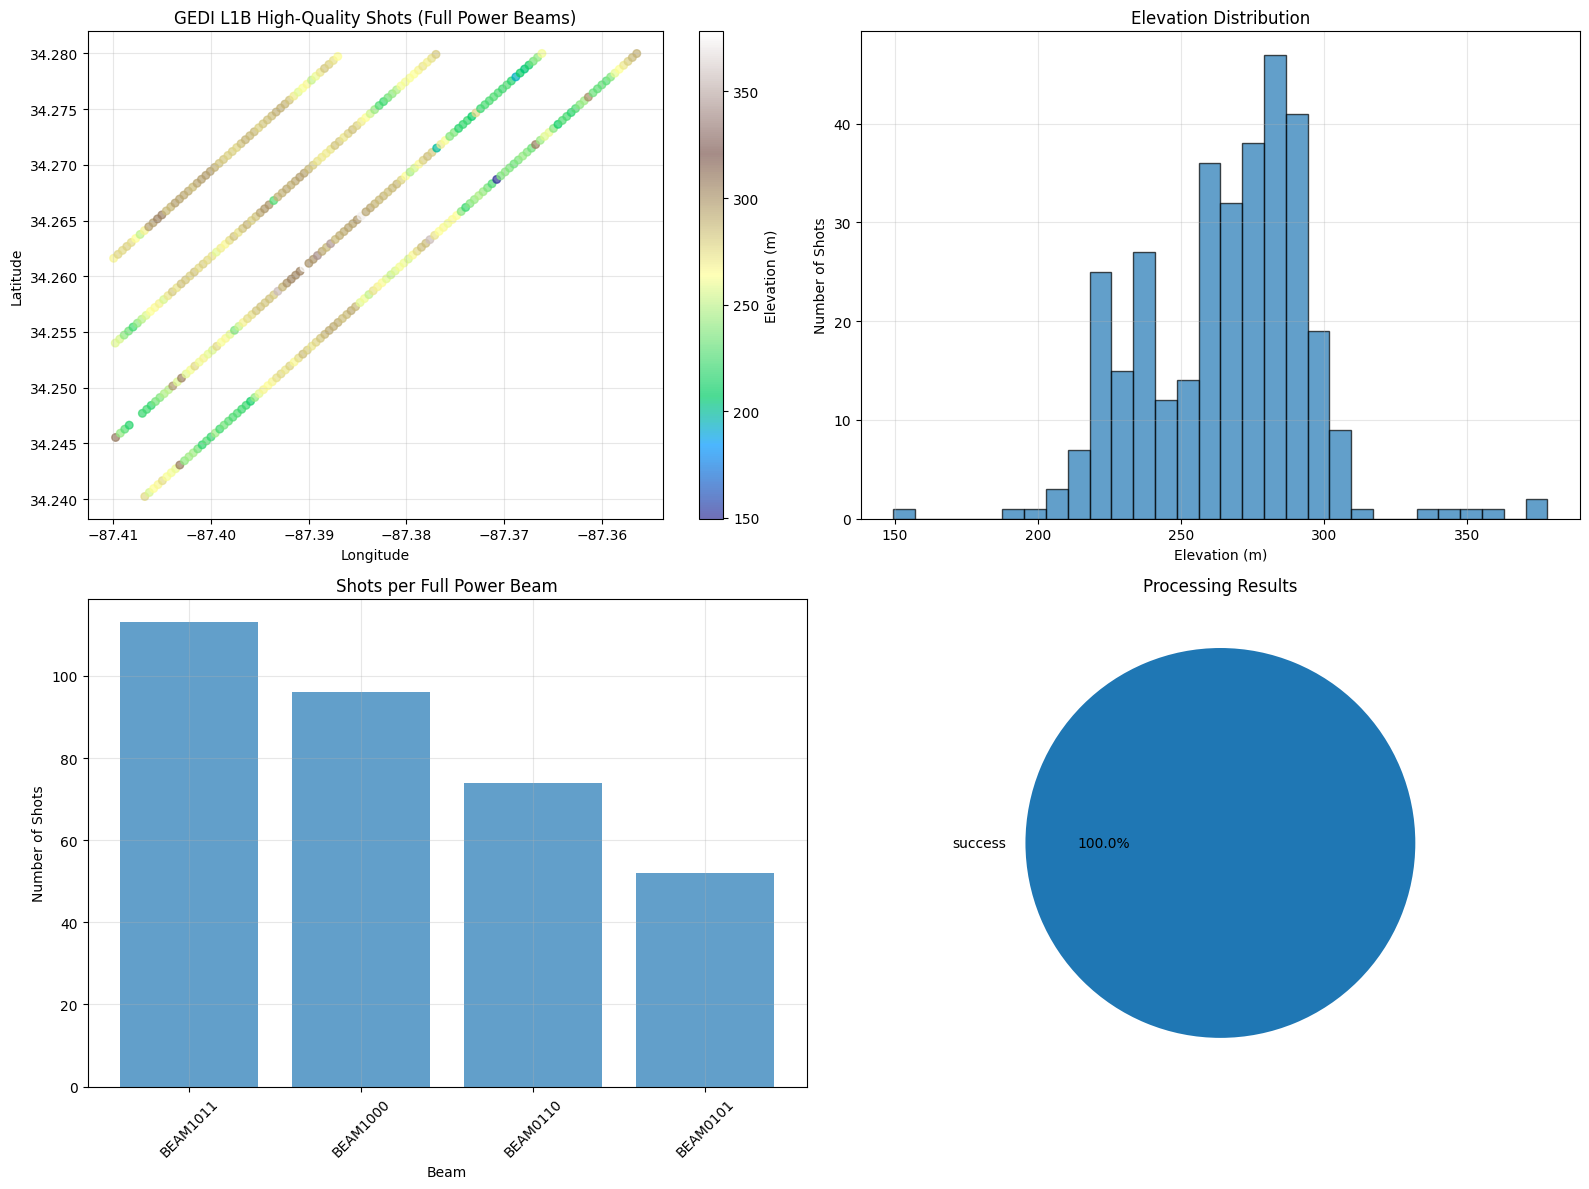


🗺️ Creating interactive map...

PROCESSING COMPLETE
✅ Data search completed
✅ Full Power beams processing only
✅ Automatic retry for quality data
✅ Demo optimization enabled (5th granule prioritized)
✅ File cleanup for unusable data
✅ Results exported

🔧 Next steps:
   - Modify aoi_bbox for your study area
   - Adjust quality filtering criteria if needed
   - Add waveform analysis functions
   - Process additional granules if needed

📁 Output files saved to: ./gedi_L1B_outputs/


In [ ]:
# 4. Authenticate with NASA Earthdata
# To download GEDI data, you need a NASA Earthdata account. If you don't have one, you can register for free.
# Run the authentication cell in the notebook, which will prompt you for your Earthdata credentials.


# Authenticate with NASA Earthdata
auth = earthaccess.login()

if auth.authenticated:
    print("✓ Successfully authenticated with NASA Earthdata!")
else:
    print("✗ Authentication failed. Please check your credentials.")

# Define your Area of Interest (AOI)
# Example: William Bankhead National Forest and surrounding area near Double Springs, AL
DEFAULT_AOI = [-87.41, 34.24, -87.35, 34.28]  # Default demo AOI
aoi_bbox = [-87.41, 34.24, -87.35, 34.28]  # [min_lon, min_lat, max_lon, max_lat] You change the details here

# Check if user is using default AOI (for demo optimization)
is_default_aoi = (aoi_bbox == DEFAULT_AOI)

print(f"Area of Interest (Bounding Box): {aoi_bbox}")
print(f"Longitude range: {aoi_bbox[0]} to {aoi_bbox[2]}")
print(f"Latitude range: {aoi_bbox[1]} to {aoi_bbox[3]}")

if is_default_aoi:
    print("🎯 Using default AOI - will prioritize 5th granule for demo efficiency")
else:
    print("📍 Using custom AOI - will process granules in standard order")

# Define temporal range
start_date = "2019-04-01" # Start of GEDI data aquisition
end_date = "2025-10-22" # Can update

print(f"Temporal range: {start_date} to {end_date}")

# Define Full Power beams only
FULL_POWER_BEAMS = ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
print(f"Processing Full Power beams only: {FULL_POWER_BEAMS}")

# Search for GEDI L1B granules - FIXED VERSION
def search_gedi_l1b(bbox, start_date, end_date, max_results=20):
    """
    Search for GEDI L1B granules - Fixed for newer earthaccess versions
    Increased max_results to have more options if files don't contain quality data

    Parameters:
    bbox: list of [min_lon, min_lat, max_lon, max_lat]
    """
    print(f"Searching for GEDI L1B data...")
    print(f"  Bounding box: {bbox}")
    print(f"  Date range: {start_date} to {end_date}")
    print(f"  Max results: {max_results}")

    # FIXED: Pass bounding box coordinates as separate arguments
    min_lon, min_lat, max_lon, max_lat = bbox

    try:
        results = earthaccess.search_data(
            short_name="GEDI01_B",
            version="002",
            bounding_box=(min_lon, min_lat, max_lon, max_lat),  # As tuple with 4 values
            temporal=(start_date, end_date),
            count=max_results
        )

        print(f"Found {len(results)} GEDI L1B granules")
        return results

    except Exception as e:
        print(f"Error in search: {str(e)}")
        print("Trying alternative bounding box format...")

        # Alternative format if the above doesn't work
        try:
            results = earthaccess.search_data(
                short_name="GEDI01_B",
                version="002",
                bounding_box=f"{min_lon},{min_lat},{max_lon},{max_lat}",  # As string
                temporal=(start_date, end_date),
                count=max_results
            )

            print(f"Found {len(results)} GEDI L1B granules")
            return results

        except Exception as e2:
            print(f"Second attempt failed: {str(e2)}")
            print("Trying without bounding box (will filter spatially later)...")

            # Last resort: search without spatial filter
            try:
                results = earthaccess.search_data(
                    short_name="GEDI01_B",
                    version="002",
                    temporal=(start_date, end_date),
                    count=max_results * 2  # Get more results to filter later
                )

                print(f"Found {len(results)} GEDI L1B granules (will filter spatially)")
                return results

            except Exception as e3:
                print(f"All search attempts failed: {str(e3)}")
                return []

# Extract and process data - Full Power beams only
def extract_gedi_l1b_data(file_path, aoi_bbox, full_power_beams_only=True):
    """Extract GEDI L1B data with spatial filtering - Full Power beams only"""
    extracted_data = {}

    print(f"\nOpening GEDI file: {os.path.basename(file_path)}")

    try:
        with h5py.File(file_path, 'r') as gedi_file:
            # Get all beam names
            all_beam_names = [key for key in gedi_file.keys() if key.startswith('BEAM')]

            # Filter to Full Power beams only
            if full_power_beams_only:
                beam_names = [beam for beam in all_beam_names if beam in FULL_POWER_BEAMS]
                print(f"Available beams: {all_beam_names}")
                print(f"Full Power beams found: {beam_names}")
            else:
                beam_names = all_beam_names
                print(f"Available beams: {beam_names}")

            if not beam_names:
                print("❌ No Full Power beams found in this file!")
                return {}

            for beam in beam_names:
                try:
                    print(f"\n  Processing {beam}...")

                    # Check if required datasets exist
                    required_datasets = [
                        f'{beam}/geolocation/latitude_bin0',
                        f'{beam}/geolocation/longitude_bin0',
                        f'{beam}/shot_number',
                        f'{beam}/geolocation/degrade',
                        f'{beam}/stale_return_flag',
                        f'{beam}/geolocation/elevation_bin0'
                    ]

                    missing_datasets = [ds for ds in required_datasets if ds not in gedi_file]
                    if missing_datasets:
                        print(f"    ⚠️ Missing datasets: {missing_datasets}")
                        continue

                    # Extract coordinate data
                    # The GEDI elevation_bin0 dataset refers to the height above the World Geodetic System 1984 (WGS84) reference ellipsoid, as interpolated from a pre-existing digital elevation model (DEM).
                    # This value provides a reference point for the ground elevation within a GEDI laser footprint.
                    lat = gedi_file[f'{beam}/geolocation/latitude_bin0'][:]
                    lon = gedi_file[f'{beam}/geolocation/longitude_bin0'][:]
                    shot_number = gedi_file[f'{beam}/shot_number'][:]
                    degrade_flag = gedi_file[f'{beam}/geolocation/degrade'][:]
                    stale_return_flag = gedi_file[f'{beam}/stale_return_flag'][:]
                    elev_bin0 = gedi_file[f'{beam}/geolocation/elevation_bin0'][:]

                    print(f"    Total shots in beam: {len(lat)}")

                    # Apply spatial filter
                    spatial_mask = (
                        (lon >= aoi_bbox[0]) & (lon <= aoi_bbox[2]) &
                        (lat >= aoi_bbox[1]) & (lat <= aoi_bbox[3])
                    )

                    spatial_shots = np.sum(spatial_mask)
                    print(f"    Shots in AOI: {spatial_shots}")

                    if spatial_shots > 0:
                        extracted_data[beam] = {
                            'latitude': lat[spatial_mask],
                            'longitude': lon[spatial_mask],
                            'shot_number': shot_number[spatial_mask],
                            'degrade_flag': degrade_flag[spatial_mask],
                            'stale_return_flag': stale_return_flag[spatial_mask],
                            'elevation_bin0': elev_bin0[spatial_mask]
                        }
                        print(f"    ✓ Extracted {spatial_shots} shots from {beam}")
                    else:
                        print(f"    ✗ No shots found in AOI for {beam}")

                except Exception as e:
                    print(f"    ❌ Error processing {beam}: {str(e)}")
                    continue

        return extracted_data

    except Exception as e:
        print(f"❌ Error opening file: {str(e)}")
        return {}

# Apply quality filtering with detailed reporting
def apply_quality_filters(gedi_data, verbose=True):
    """Apply standard GEDI quality filters with detailed reporting"""
    if verbose:
        print(f"\nApplying quality filters...")
        print("  Criteria: degrade_flag = 0, stale_return_flag = 0")

    filtered_data = {}
    total_before = 0
    total_after = 0

    for beam, data in gedi_data.items():
        if len(data['shot_number']) == 0:
            continue

        # Apply quality filters
        quality_mask = (
            (data['degrade_flag'] == 0) &
            (data['stale_return_flag'] == 0)
        )

        shots_before = len(data['shot_number'])
        shots_after = np.sum(quality_mask)
        retention_rate = (shots_after / shots_before * 100) if shots_before > 0 else 0

        total_before += shots_before
        total_after += shots_after

        if verbose:
            print(f"  {beam}: {shots_before} → {shots_after} shots ({retention_rate:.1f}% retained)")

        if shots_after > 0:
            filtered_data[beam] = {
                'latitude': data['latitude'][quality_mask],
                'longitude': data['longitude'][quality_mask],
                'shot_number': data['shot_number'][quality_mask],
                'elevation_bin0': data['elevation_bin0'][quality_mask],
                'degrade_flag': data['degrade_flag'][quality_mask],
                'stale_return_flag': data['stale_return_flag'][quality_mask]
            }

    overall_retention = (total_after / total_before * 100) if total_before > 0 else 0

    if verbose:
        print(f"\nOverall: {total_before} → {total_after} shots ({overall_retention:.1f}% retained)")

    return filtered_data, overall_retention, total_after

def delete_file_safely(file_path):
    """Safely delete a file with confirmation"""
    try:
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"🗑️ Deleted file: {os.path.basename(file_path)}")
            return True
        else:
            print(f"⚠️ File not found for deletion: {file_path}")
            return False
    except Exception as e:
        print(f"❌ Error deleting file {file_path}: {str(e)}")
        return False

def process_gedi_granules_with_retry(gedi_granules, aoi_bbox, is_default_aoi=False, max_attempts=5):
    """
    Process GEDI granules with automatic retry if no quality data is found
    If using default AOI, prioritizes 5th granule for demo efficiency

    Parameters:
    gedi_granules: list of granules from earthaccess search
    aoi_bbox: area of interest bounding box
    is_default_aoi: bool, whether using the default demo AOI
    max_attempts: maximum number of files to try

    Returns:
    tuple: (success, result_df, processed_file_info)
    """

    download_dir = "./gedi_data"
    os.makedirs(download_dir, exist_ok=True)

    attempts = 0
    processed_files = []

    # DEMO OPTIMIZATION: If using default AOI, start with 5th granule
    if is_default_aoi and len(gedi_granules) >= 5:
        print(f"\n🎯 DEMO MODE: Starting with 5th granule (known to have quality data)")
        print(f"   This skips the first 4 granules which had issues in testing")
        # Reorder granules to prioritize the 5th one
        granule_order = [4] + [i for i in range(len(gedi_granules)) if i != 4]
    else:
        # Standard order for custom AOI
        granule_order = list(range(len(gedi_granules)))

    for idx in granule_order:
        if attempts >= max_attempts:
            print(f"\n⚠️ Reached maximum attempts ({max_attempts}). Stopping.")
            break

        if idx >= len(gedi_granules):
            continue

        granule = gedi_granules[idx]
        attempts += 1

        try:
            granule_id = granule['umm']['GranuleUR']
        except:
            granule_id = f"Granule_{idx+1}"

        print(f"\n{'='*80}")
        print(f"ATTEMPT {attempts}/{max_attempts}: Processing {granule_id}")
        if is_default_aoi and idx == 4 and attempts == 1:
            print(f"   (5th granule - prioritized for demo)")
        print(f"{'='*80}")

        # Download the granule
        print(f"📥 Downloading granule...")
        try:
            downloaded_files = earthaccess.download(
                [granule],  # Download single granule
                local_path=download_dir
            )

            if not downloaded_files:
                print(f"❌ Download failed for {granule_id}")
                continue

            sample_file = downloaded_files[0]
            file_size = os.path.getsize(sample_file) / 1e9
            print(f"✓ Downloaded: {os.path.basename(sample_file)} ({file_size:.2f} GB)")

        except Exception as e:
            print(f"❌ Download error for {granule_id}: {str(e)}")
            continue

        # Process the file
        print(f"\n📊 Processing GEDI L1B data...")

        # Extract data
        gedi_data = extract_gedi_l1b_data(sample_file, aoi_bbox, full_power_beams_only=True)

        if not gedi_data:
            print(f"❌ No spatial data found in AOI for {granule_id}")
            print(f"🗑️ Deleting file with no useful data...")
            delete_file_safely(sample_file)
            processed_files.append({
                'granule_id': granule_id,
                'file_name': os.path.basename(sample_file),
                'file_size_gb': file_size,
                'status': 'no_spatial_data',
                'shots_extracted': 0,
                'shots_after_qa': 0,
                'retention_rate': 0.0
            })
            continue

        # Apply quality filters
        filtered_gedi_data, retention_rate, shots_after_qa = apply_quality_filters(gedi_data, verbose=True)

        # Record processing info
        total_shots_extracted = sum(len(data['shot_number']) for data in gedi_data.values())
        processed_files.append({
            'granule_id': granule_id,
            'file_name': os.path.basename(sample_file),
            'file_size_gb': file_size,
            'status': 'processed',
            'shots_extracted': total_shots_extracted,
            'shots_after_qa': shots_after_qa,
            'retention_rate': retention_rate
        })

        # Check if we found quality data
        if shots_after_qa == 0:
            print(f"\n❌ No shots passed quality filtering for {granule_id}")
            print(f"🗑️ Deleting file with no quality data...")
            delete_file_safely(sample_file)
            processed_files[-1]['status'] = 'no_quality_data'

            if attempts < max_attempts:
                print(f"\n🔄 Trying next granule... ({attempts}/{max_attempts} attempts)")
            continue
        else:
            # Success! We found quality data
            print(f"\n🎉 SUCCESS! Found {shots_after_qa} high-quality shots in {granule_id}")

            # Create summary DataFrame
            print(f"\n📋 Creating summary DataFrame...")
            all_data = []

            for beam, data in filtered_gedi_data.items():
                beam_df = pd.DataFrame({
                    'granule_id': granule_id,
                    'beam': beam,
                    'shot_number': data['shot_number'],
                    'latitude': data['latitude'],
                    'longitude': data['longitude'],
                    'elevation_bin0': data['elevation_bin0'],
                    'degrade_flag': data['degrade_flag'],
                    'stale_return_flag': data['stale_return_flag']
                })
                all_data.append(beam_df)

            result_df = pd.concat(all_data, ignore_index=True)
            processed_files[-1]['status'] = 'success'

            return True, result_df, processed_files, sample_file

    # If we get here, no files had quality data
    print(f"\n❌ No granules contained quality data after {attempts} attempts")
    return False, None, processed_files, None

# Perform the search
print(f"\n🔍 Searching for GEDI L1B granules...")
gedi_granules = search_gedi_l1b(aoi_bbox, start_date, end_date, max_results=20)

if gedi_granules:
    print(f"\n📋 Found granules:")
    for i, granule in enumerate(gedi_granules[:5]):  # Show first 5
        try:
            granule_id = granule['umm']['GranuleUR']
            demo_note = " (← DEMO PRIORITY)" if is_default_aoi and i == 4 else ""
            print(f"  {i+1}. {granule_id}{demo_note}")
        except:
            print(f"  {i+1}. Granule found (ID extraction failed)")

    if len(gedi_granules) > 5:
        print(f"  ... and {len(gedi_granules) - 5} more granules")

    # Process granules with automatic retry (and demo optimization if applicable)
    print(f"\n🚀 Starting processing with automatic retry...")
    success, result_df, processing_log, final_file = process_gedi_granules_with_retry(
        gedi_granules, aoi_bbox, is_default_aoi=is_default_aoi, max_attempts=5
    )

    # Display processing summary
    print(f"\n{'='*80}")
    print("PROCESSING SUMMARY")
    print(f"{'='*80}")

    processing_df = pd.DataFrame(processing_log)
    if not processing_df.empty:
        print(f"\nFiles processed:")
        for _, row in processing_df.iterrows():
            status_icon = {
                'success': '✅',
                'no_spatial_data': '🚫',
                'no_quality_data': '❌',
                'processed': '📊'
            }.get(row['status'], '❓')

            print(f"  {status_icon} {row['file_name']} ({row['file_size_gb']:.2f} GB)")
            print(f"      Status: {row['status']}")
            print(f"      Shots extracted: {row['shots_extracted']}")
            print(f"      Shots after QA: {row['shots_after_qa']}")
            print(f"      Retention rate: {row['retention_rate']:.1f}%")

    if success and result_df is not None:
        print(f"\n🎉 FINAL RESULTS:")
        print(f"  ✅ Successfully processed granule with quality data")
        print(f"  📊 Total high-quality shots: {len(result_df)}")
        print(f"  🎯 Full Power beams processed: {result_df['beam'].nunique()}")

        # Display sample data
        print(f"\n📋 Sample of processed data:")
        print(result_df.head(10))

        print(f"\n📈 Data summary:")
        print(f"  Beams processed: {result_df['beam'].nunique()}")
        print(f"  Shots per beam: {result_df.groupby('beam').size().to_dict()}")
        print(f"  Elevation range: {result_df['elevation_bin0'].min():.1f} to {result_df['elevation_bin0'].max():.1f} m")
        print(f"  Latitude range: {result_df['latitude'].min():.6f} to {result_df['latitude'].max():.6f}")
        print(f"  Longitude range: {result_df['longitude'].min():.6f} to {result_df['longitude'].max():.6f}")

        # Export results
        output_dir = "./gedi_L1B_outputs"
        os.makedirs(output_dir, exist_ok=True)

        # Export main results
        csv_path = os.path.join(output_dir, "gedi_l1b_quality_filtered_full_power.csv")
        result_df.to_csv(csv_path, index=False)
        print(f"\n💾 Results exported to: {csv_path}")

        # Export processing log
        log_path = os.path.join(output_dir, "processing_log.csv")
        processing_df.to_csv(log_path, index=False)
        print(f"💾 Processing log exported to: {log_path}")

        # Create visualization
        print(f"\n📊 Creating visualizations...")
        plt.figure(figsize=(16, 10))

        # Create subplot layout
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Plot 1: Shot locations colored by elevation
        scatter = ax1.scatter(result_df['longitude'], result_df['latitude'],
                            c=result_df['elevation_bin0'], cmap='terrain', s=30, alpha=0.7)
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.set_title('GEDI L1B High-Quality Shots (Full Power Beams)')
        ax1.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax1, label='Elevation (m)')

        # Plot 2: Elevation histogram
        ax2.hist(result_df['elevation_bin0'], bins=30, alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Elevation (m)')
        ax2.set_ylabel('Number of Shots')
        ax2.set_title('Elevation Distribution')
        ax2.grid(True, alpha=0.3)

        # Plot 3: Shots per beam
        beam_counts = result_df['beam'].value_counts()
        ax3.bar(beam_counts.index, beam_counts.values, alpha=0.7)
        ax3.set_xlabel('Beam')
        ax3.set_ylabel('Number of Shots')
        ax3.set_title('Shots per Full Power Beam')
        ax3.grid(True, alpha=0.3)
        plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

        # Plot 4: Processing attempts
        status_counts = processing_df['status'].value_counts()
        ax4.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
        ax4.set_title('Processing Results')

        plt.tight_layout()
        plt.show()

        # Create interactive map
        print(f"\n🗺️ Creating interactive map...")
        center_lat = result_df['latitude'].mean()
        center_lon = result_df['longitude'].mean()

        m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

        # Add AOI rectangle
        folium.Rectangle(
            bounds=[[aoi_bbox[1], aoi_bbox[0]], [aoi_bbox[3], aoi_bbox[2]]],
            fill=False,
            color='red',
            weight=3,
            popup='Area of Interest'
        ).add_to(m)

        # Color map for different beams
        beam_colors = {'BEAM0101': 'red', 'BEAM0110': 'blue', 'BEAM1000': 'green', 'BEAM1011': 'orange'}

        # Add points colored by beam
        for _, row in result_df.iterrows():
            color = beam_colors.get(row['beam'], 'gray')
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=4,
                popup=f"Beam: {row['beam']}<br>Shot: {row['shot_number']}<br>Elevation: {row['elevation_bin0']:.1f}m",
                color=color,
                fillColor=color,
                fillOpacity=0.7
            ).add_to(m)

        # Add legend
        legend_html = '''
        <div style="position: fixed;
                    bottom: 50px; left: 50px; width: 150px; height: 90px;
                    background-color: white; border:2px solid grey; z-index:9999;
                    font-size:14px; padding: 10px">
        <p><b>Full Power Beams</b></p>
        <p><i class="fa fa-circle" style="color:red"></i> BEAM0101</p>
        <p><i class="fa fa-circle" style="color:blue"></i> BEAM0110</p>
        <p><i class="fa fa-circle" style="color:green"></i> BEAM1000</p>
        <p><i class="fa fa-circle" style="color:orange"></i> BEAM1011</p>
        </div>
        '''
        m.get_root().html.add_child(folium.Element(legend_html))

        # Display map
        m

    else:
        print(f"\n❌ PROCESSING FAILED:")
        print(f"  No granules contained quality data in the AOI")
        print(f"  Files attempted: {len(processing_log)}")
        print(f"\n💡 Suggestions:")
        print(f"    - Expand your AOI bounding box")
        print(f"    - Try a different time period")
        print(f"    - Check if your AOI is in a valid GEDI coverage area (±51.6° latitude)")

else:
    print("❌ No granules found. Try expanding your search criteria.")

print(f"\n{'='*80}")
print("PROCESSING COMPLETE")
print(f"{'='*80}")
print("✅ Data search completed")
print("✅ Full Power beams processing only")
print("✅ Automatic retry for quality data")
if is_default_aoi:
    print("✅ Demo optimization enabled (5th granule prioritized)")
print("✅ File cleanup for unusable data")
print("✅ Results exported")
print("\n🔧 Next steps:")
print("   - Modify aoi_bbox for your study area")
print("   - Adjust quality filtering criteria if needed")
print("   - Add waveform analysis functions")
print("   - Process additional granules if needed")
print("\n📁 Output files saved to: ./gedi_L1B_outputs/")


WAVEFORM VISUALIZATION MODULE - MAP FIRST, THEN WAVEFORMS

WAVEFORM ANALYSIS READY!
Data available: 335 high-quality shots
Elevation_bin0 range: 149.5 to 378.2 m
Mean elevation_bin0: 265.54 ± 28.89 m

USER CONFIGURATION:
   Standard deviations from mean: -0.5
   This will select shots with elevation_bin0 ≈ 251.1 m
Target selection parameters:
   Mean elevation_bin0: 265.54 m
   Std elevation_bin0:  28.89 m
   Target elevation_bin0: 251.09 m (-0.5σ)
Selected 10 shots:
   1. Shot 55401100200252164: elevation_bin0=251.44m, Lat=34.260124, Lon=-87.381593, Beam=BEAM1011
   2. Shot 55401100200252159: elevation_bin0=250.50m, Lat=34.258348, Lon=-87.383841, Beam=BEAM1011
   3. Shot 55400800200251839: elevation_bin0=251.80m, Lat=34.255493, Lon=-87.397156, Beam=BEAM1000
   4. Shot 55400500200252320: elevation_bin0=250.37m, Lat=34.263749, Lon=-87.407259, Beam=BEAM0101
   5. Shot 55400500200252359: elevation_bin0=252.22m, Lat=34.277597, Lon=-87.389719, Beam=BEAM0101
   6. Shot 55400800200251823: el


⬇️  SCROLL DOWN TO SEE WAVEFORM PLOTS BELOW ⬇️


STEP 2: WAVEFORM PLOTS (2 rows x 5 columns = 10 total)

Extracting waveforms from GEDI01_B_2019338181324_O05540_02_T00842_02_005_01_V002.h5...
   Extracted waveform for shot 55401100200252164 (960 samples)
   Extracted waveform for shot 55401100200252159 (784 samples)
   Extracted waveform for shot 55400800200251839 (988 samples)
   Extracted waveform for shot 55400500200252320 (765 samples)
   Extracted waveform for shot 55400500200252359 (909 samples)
   Extracted waveform for shot 55400800200251823 (960 samples)
   Extracted waveform for shot 55400600200252051 (921 samples)
   Extracted waveform for shot 55400600200251999 (969 samples)
   Extracted waveform for shot 55400800200251879 (958 samples)
   Extracted waveform for shot 55400600200251994 (954 samples)
Extracted 10 waveforms


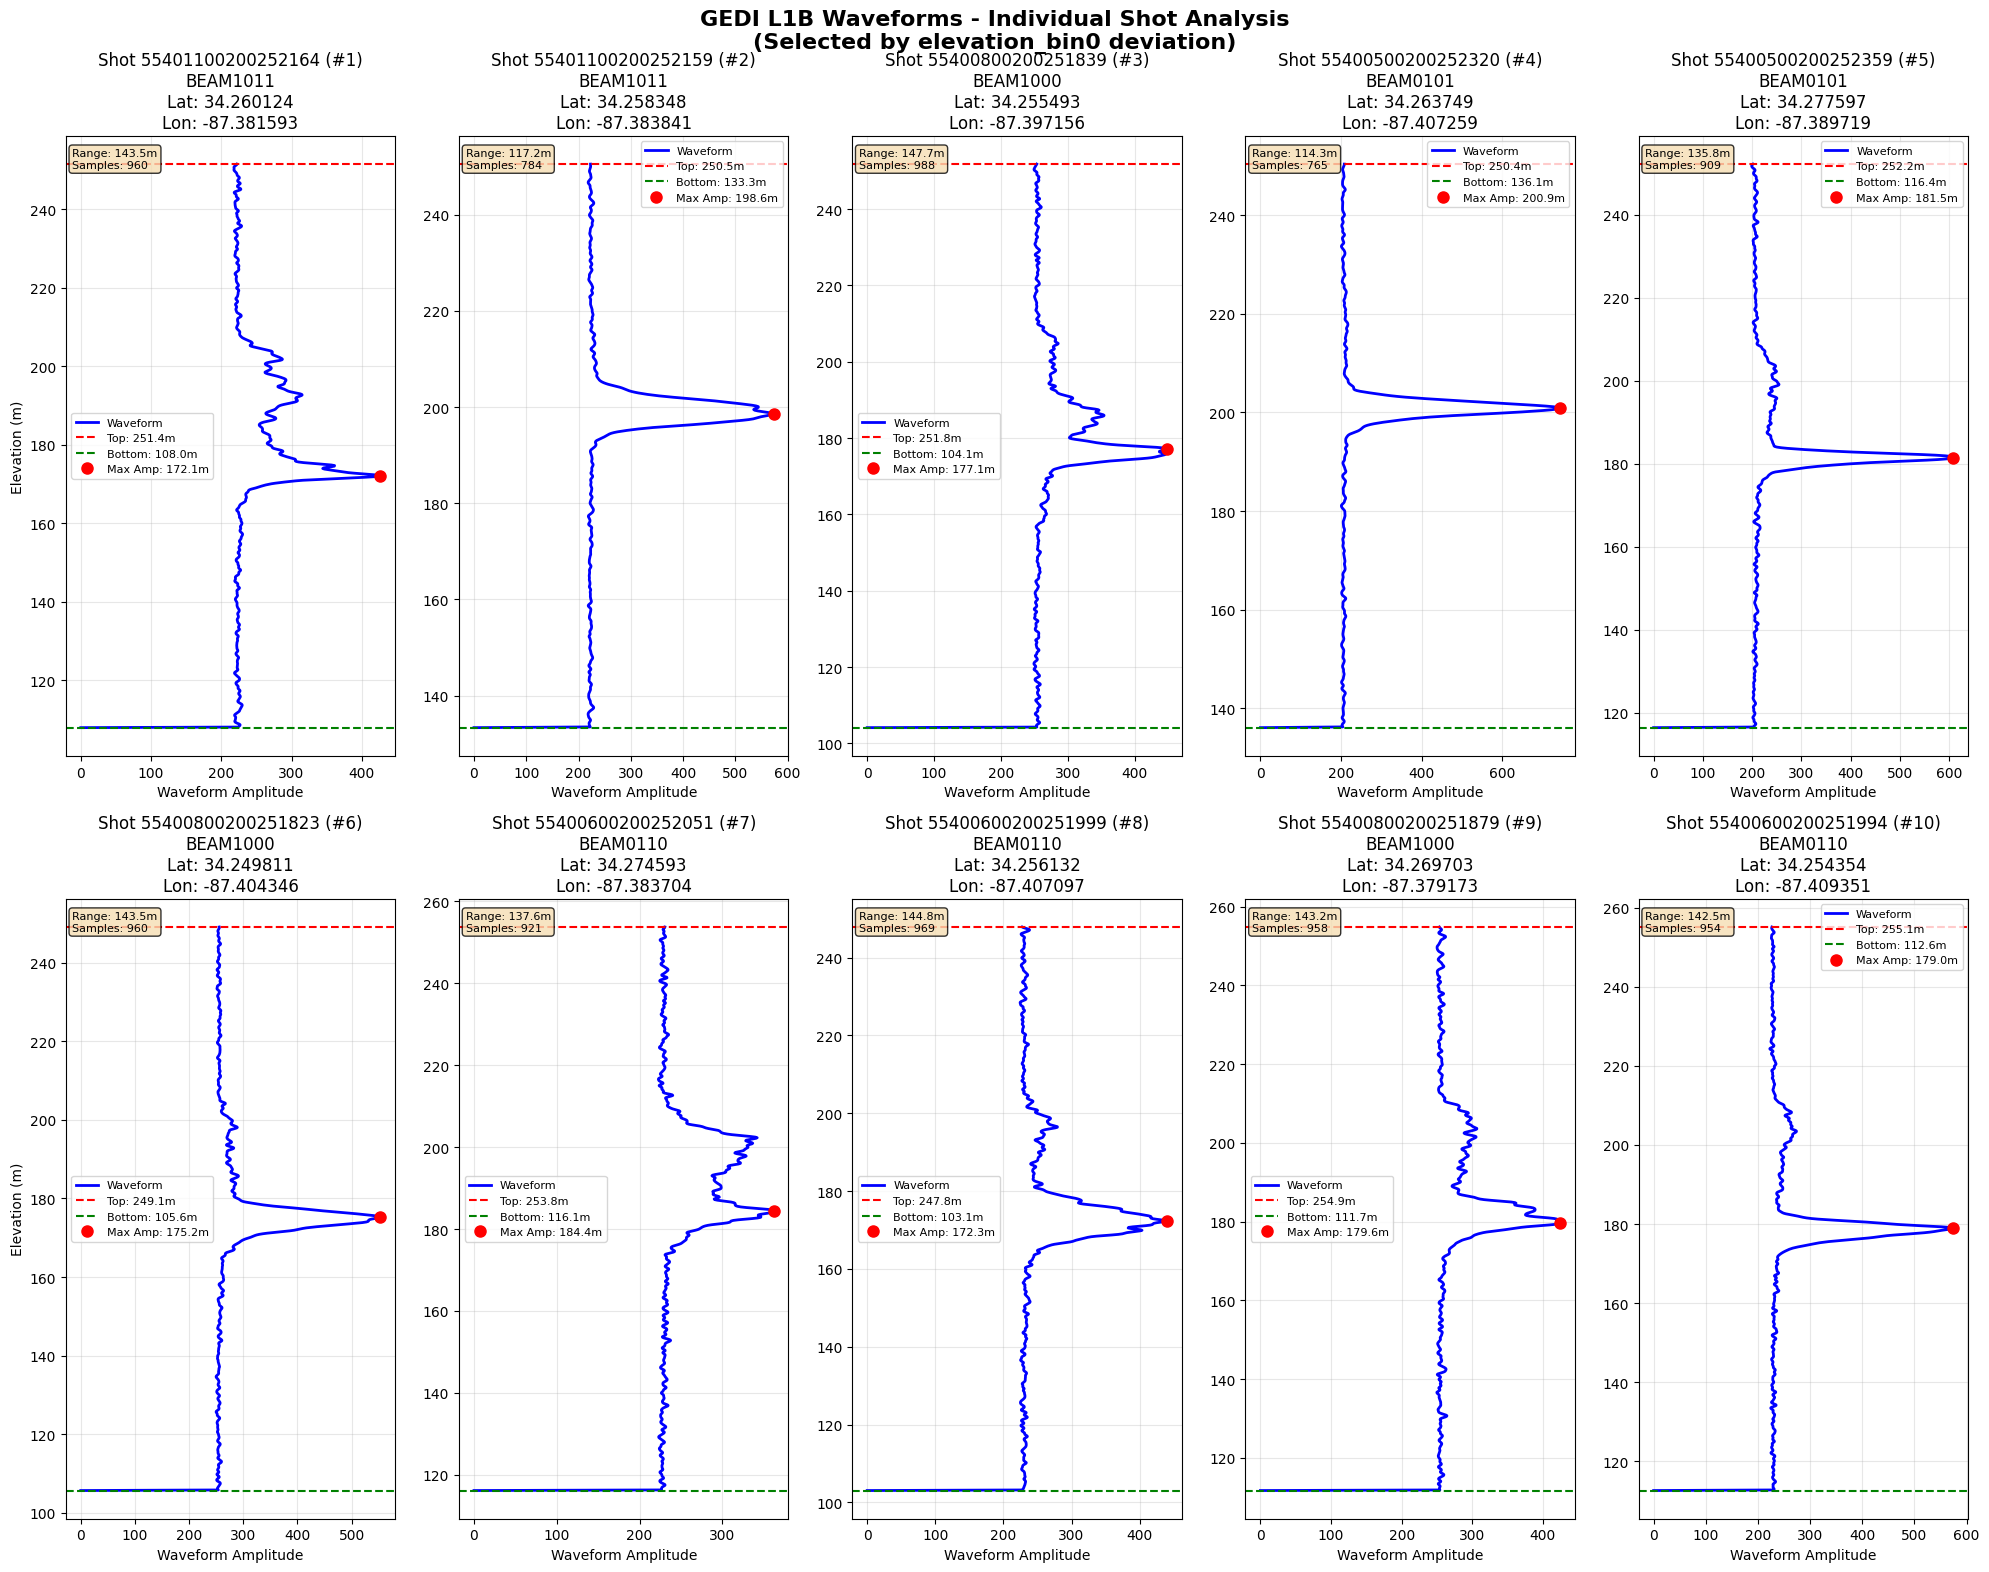


✓ VISUALIZATION COMPLETE!

📊 Summary:
   • Interactive map displayed at top
   • 10 shots highlighted with yellow outlines
   • 10 waveforms plotted below map
   • 335 total GEDI shots shown

⬆️  Scroll UP to see the interactive map


In [ ]:
# GEDI L1B Waveform Visualization - Map First, Then Waveforms
# Run this AFTER the main processing code block has completed successfully
# This code displays the interactive map FIRST, then the waveform plots below


import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MeasureControl, Fullscreen, MiniMap
import h5py
import os

print(f"\n{'='*80}")
print("WAVEFORM VISUALIZATION MODULE - MAP FIRST, THEN WAVEFORMS")
print(f"{'='*80}")

def select_shots_by_elevation_deviation(result_df, sd_from_mean=0.0, n_shots=10):
    """
    Select shots based on standard deviations from mean elevation_bin0

    Parameters:
    result_df: DataFrame with shot data including elevation_bin0
    sd_from_mean: float, standard deviations from mean (positive or negative)
    n_shots: int, number of shots to select

    Returns:
    DataFrame with selected shots
    """

    mean_elevation = result_df['elevation_bin0'].mean()
    std_elevation = result_df['elevation_bin0'].std()
    target_elevation = mean_elevation + (sd_from_mean * std_elevation)

    print(f"Target selection parameters:")
    print(f"   Mean elevation_bin0: {mean_elevation:.2f} m")
    print(f"   Std elevation_bin0:  {std_elevation:.2f} m")
    print(f"   Target elevation_bin0: {target_elevation:.2f} m ({sd_from_mean:+.1f}σ)")

    # Calculate distance from target
    result_df_copy = result_df.copy()
    result_df_copy['elevation_distance'] = np.abs(result_df_copy['elevation_bin0'] - target_elevation)

    # Select the closest shots
    selected_shots = result_df_copy.nsmallest(n_shots, 'elevation_distance')

    print(f"Selected {len(selected_shots)} shots:")
    for i, (_, row) in enumerate(selected_shots.iterrows()):
        print(f"   {i+1}. Shot {row['shot_number']}: elevation_bin0={row['elevation_bin0']:.2f}m, "
              f"Lat={row['latitude']:.6f}, Lon={row['longitude']:.6f}, Beam={row['beam']}")

    return selected_shots

def create_highlighted_map_simple(result_df, selected_shots):
    """
    Create an interactive map with satellite imagery highlighting the selected shots
    All shots shown as ~25m diameter circles with transparent fill
    Selected shots have thicker yellow outlines with labels positioned outside

    Parameters:
    result_df: DataFrame with all shot data
    selected_shots: DataFrame with selected shots to highlight
    """

    print(f"\nCreating map with highlighted shots...")

    # Calculate map center
    center_lat = result_df['latitude'].mean()
    center_lon = result_df['longitude'].mean()

    # Create base map with satellite imagery ONLY (simplified approach that works)
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=14,
        tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr='Esri World Imagery'
    )

    # Add AOI rectangle in light grey
    folium.Rectangle(
        bounds=[[aoi_bbox[1], aoi_bbox[0]], [aoi_bbox[3], aoi_bbox[2]]],
        fill=False,
        color='#D3D3D3',  # Light grey
        weight=3,
        popup='<b>Area of Interest</b><br>GEDI L1B Data Extent',
        tooltip='Study Area Boundary'
    ).add_to(m)

    # Get elevation color mapping
    min_elev = result_df['elevation_bin0'].min()
    max_elev = result_df['elevation_bin0'].max()

    def get_elevation_color(elevation, min_val, max_val):
        """Get color based on elevation value"""
        if max_val > min_val:
            norm = (elevation - min_val) / (max_val - min_val)
        else:
            norm = 0.5

        if norm < 0.25:
            return '#000080'  # Dark blue (lowest)
        elif norm < 0.5:
            return '#0000FF'  # Blue
        elif norm < 0.75:
            return '#00FF00'  # Green
        else:
            return '#FF0000'  # Red (highest)

    # Add all shots with elevation-based outline colors and transparent fill
    print(f"   Adding {len(result_df)} shots to map...")
    for _, row in result_df.iterrows():
        color = get_elevation_color(row['elevation_bin0'], min_elev, max_elev)

        folium.Circle(
            location=[row['latitude'], row['longitude']],
            radius=12.5,  # 12.5m radius = 25m diameter (realistic GEDI footprint)
            popup=f"<b>GEDI Shot</b><br>"
                  f"Beam: {row['beam']}<br>"
                  f"Shot: {row['shot_number']}<br>"
                  f"Elevation: {row['elevation_bin0']:.1f}m<br>"
                  f"Lat: {row['latitude']:.6f}<br>"
                  f"Lon: {row['longitude']:.6f}",
            tooltip=f"Shot {row['shot_number']}: {row['elevation_bin0']:.1f}m",
            color=color,
            weight=1.5,
            fill=True,
            fillColor=color,
            fillOpacity=0.0  # Transparent fill
        ).add_to(m)

    # Highlight selected shots with thicker bright yellow outlines and transparent fill
    print(f"   Highlighting {len(selected_shots)} selected shots...")
    for i, (_, shot) in enumerate(selected_shots.iterrows()):
        # Yellow circle outline with transparent fill
        folium.Circle(
            location=[shot['latitude'], shot['longitude']],
            radius=12.5,  # Same 25m diameter as other footprints
            popup=f"<b>SELECTED SHOT {i+1}</b><br>"
                  f"<b>Beam:</b> {shot['beam']}<br>"
                  f"<b>Shot Number:</b> {shot['shot_number']}<br>"
                  f"<b>Elevation:</b> {shot['elevation_bin0']:.2f}m<br>"
                  f"<b>Latitude:</b> {shot['latitude']:.6f}<br>"
                  f"<b>Longitude:</b> {shot['longitude']:.6f}<br>"
                  f"<b>Selection Rank:</b> #{i+1}",
            tooltip=f"Selected Shot {i+1}",
            color='#FFFF00',  # Bright yellow outline
            weight=6,  # Double thickness
            fill=True,
            fillColor='yellow',
            fillOpacity=0.0  # Transparent fill to show basemap
        ).add_to(m)

        # Add number label positioned outside the circle (smaller and closer)
        folium.Marker(
            location=[shot['latitude'], shot['longitude']],
            icon=folium.DivIcon(
                html=f"""<div style='
                    font-size: 12pt;
                    font-weight: bold;
                    color: white;
                    text-shadow:
                        -1px -1px 0 #000,
                        1px -1px 0 #000,
                        -1px 1px 0 #000,
                        1px 1px 0 #000;
                    margin-left: 15px;
                    margin-top: -6px;
                '>{i+1}</div>""",
                icon_size=(30, 16),
                icon_anchor=(0, 8)
            )
        ).add_to(m)

    # ORIGINAL LEGEND
    legend_html = f'''
    <div style="position: fixed;
                bottom: 50px; left: 50px; width: 260px; height: 220px;
                background-color: rgba(255,255,255,0.95);
                border: 3px solid black;
                border-radius: 10px;
                z-index: 9999;
                font-size: 12px;
                padding: 15px;
                box-shadow: 0 4px 8px rgba(0,0,0,0.3);">
    <h4 style="margin-top: 0; color: #2E8B57;"><b>🛰️ GEDI L1B Data</b></h4>

    <p style="margin: 5px 0;"><b>📊 Elevation Color Scale:</b></p>
    <p style="margin: 2px 0;"><span style="color: #000080;">●</span> Lowest ({min_elev:.0f}m)</p>
    <p style="margin: 2px 0;"><span style="color: #0000FF;">●</span> Low-Medium</p>
    <p style="margin: 2px 0;"><span style="color: #00FF00;">●</span> Medium-High</p>
    <p style="margin: 2px 0;"><span style="color: #FF0000;">●</span> Highest ({max_elev:.0f}m)</p>

    <p style="margin: 2px 0;"><span style="background-color: yellow; padding: 2px 6px; border-radius: 3px;">⚫</span> Waveform Analysis</p>

    <p style="margin: 2px 0;"><span style="color: yellow;">⬜</span> Area of Interest Boundary</p>

    <p style="margin: 5px 0 0 0; font-size: 10px; color: #666;">
    Use layer control (top-right) to change basemap
    </p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))

    # Add a scale bar
    m.add_child(MeasureControl(primary_length_unit='meters', secondary_length_unit='miles'))

    # Add fullscreen button
    Fullscreen().add_to(m)

    # Add minimap
    minimap = MiniMap(toggle_display=True, width=200, height=150)
    m.add_child(minimap)

    print(f"   Interactive map created with satellite imagery")
    print(f"   {len(result_df)} total shots displayed (25m diameter circles)")
    print(f"   {len(selected_shots)} shots highlighted with yellow outlines")

    return m

def extract_and_plot_waveforms_simple(file_path, selected_shots):
    """
    Extract and plot waveforms for selected shots using elevation_bin0

    Parameters:
    file_path: str, path to GEDI L1B HDF5 file
    selected_shots: DataFrame with selected shot information
    """

    print(f"\nExtracting waveforms from {os.path.basename(file_path)}...")

    waveform_data = []

    with h5py.File(file_path, 'r') as gedi_file:
        # Get the full waveform data for all Full Power beams
        rxwaveform_full = {}
        for beam in FULL_POWER_BEAMS:
            if beam in gedi_file:
                rxwaveform_full[beam] = gedi_file[f'{beam}/rxwaveform'][:]

        # Extract waveforms for each selected shot
        for i, (_, shot) in enumerate(selected_shots.iterrows()):
            beam = shot['beam']

            # We need to get all the required data from the HDF5 file
            # Find the shot in the original beam data
            shot_numbers = gedi_file[f'{beam}/shot_number'][:]
            shot_idx = np.where(shot_numbers == shot['shot_number'])[0]

            if len(shot_idx) == 0:
                print(f"   Shot {shot['shot_number']} not found in {beam}")
                continue

            shot_idx = shot_idx[0]

            # Get all the data we need from the file
            start_idx = gedi_file[f'{beam}/rx_sample_start_index'][shot_idx]
            sample_count = gedi_file[f'{beam}/rx_sample_count'][shot_idx]
            elevation_bin0 = gedi_file[f'{beam}/geolocation/elevation_bin0'][shot_idx]
            elevation_lastbin = gedi_file[f'{beam}/geolocation/elevation_lastbin'][shot_idx]

            if beam in rxwaveform_full and sample_count > 0:
                # Extract the waveform
                waveform = rxwaveform_full[beam][start_idx:start_idx + sample_count]

                # Create elevation array for this waveform
                elevations = np.linspace(elevation_bin0, elevation_lastbin, len(waveform))

                waveform_data.append({
                    'shot_number': shot['shot_number'],
                    'beam': beam,
                    'latitude': shot['latitude'],
                    'longitude': shot['longitude'],
                    'elevation_bin0': elevation_bin0,
                    'elevation_lastbin': elevation_lastbin,
                    'waveform': waveform,
                    'elevations': elevations,
                    'elevation_range': elevation_bin0 - elevation_lastbin,
                    'selection_rank': i + 1
                })

                print(f"   Extracted waveform for shot {shot['shot_number']} ({len(waveform)} samples)")
            else:
                print(f"   Could not extract waveform for shot {shot['shot_number']} in {beam}")

    if not waveform_data:
        print("No waveforms could be extracted")
        return None

    print(f"Extracted {len(waveform_data)} waveforms")

    # Create the waveform plots in 2 rows of 5
    n_waveforms = len(waveform_data)
    n_cols = 5
    n_rows = int(np.ceil(n_waveforms / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8*n_rows), sharey=False)

    # Flatten axes array for easier indexing
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()

    for i, (ax, wf_data) in enumerate(zip(axes_flat[:n_waveforms], waveform_data)):
        # Plot the waveform
        ax.plot(wf_data['waveform'], wf_data['elevations'], 'b-', linewidth=2, label='Waveform')

        # Mark the top of waveform (elevation_bin0)
        ax.axhline(y=wf_data['elevation_bin0'], color='red', linestyle='--',
                  label=f'Top: {wf_data["elevation_bin0"]:.1f}m')

        # Mark the bottom of waveform (elevation_lastbin)
        ax.axhline(y=wf_data['elevation_lastbin'], color='green', linestyle='--',
                  label=f'Bottom: {wf_data["elevation_lastbin"]:.1f}m')

        # Find and mark the maximum amplitude point
        max_amp_idx = np.argmax(wf_data['waveform'])
        max_amp_elevation = wf_data['elevations'][max_amp_idx]
        max_amp_value = wf_data['waveform'][max_amp_idx]
        ax.plot(max_amp_value, max_amp_elevation, 'ro', markersize=8,
               label=f'Max Amp: {max_amp_elevation:.1f}m')

        # Formatting
        ax.set_xlabel('Waveform Amplitude')
        if i % n_cols == 0:  # Only leftmost plots get y-label
            ax.set_ylabel('Elevation (m)')

        ax.set_title(f"Shot {wf_data['shot_number']} (#{wf_data['selection_rank']})\n"
                    f"{wf_data['beam']}\n"
                    f"Lat: {wf_data['latitude']:.6f}\n"
                    f"Lon: {wf_data['longitude']:.6f}")

        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

        # Add some stats as text
        stats_text = f"Range: {wf_data['elevation_range']:.1f}m\nSamples: {len(wf_data['waveform'])}"
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
               verticalalignment='top', fontsize=8,
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Hide any unused subplots
    for i in range(n_waveforms, len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.suptitle('GEDI L1B Waveforms - Individual Shot Analysis\n(Selected by elevation_bin0 deviation)',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return waveform_data

# USER INTERFACE: Analysis with Map First, Then Waveforms
# Check if we have the required data from the main processing block
if 'result_df' in locals() and result_df is not None and 'final_file' in locals() and final_file is not None:
    print(f"\nWAVEFORM ANALYSIS READY!")
    print(f"Data available: {len(result_df)} high-quality shots")
    print(f"Elevation_bin0 range: {result_df['elevation_bin0'].min():.1f} to {result_df['elevation_bin0'].max():.1f} m")
    print(f"Mean elevation_bin0: {result_df['elevation_bin0'].mean():.2f} ± {result_df['elevation_bin0'].std():.2f} m")

    # USER CONFIGURATION: Set your desired standard deviation
    user_sd_from_mean = -0.5  # CHANGE THIS VALUE You can change it to 2 and the results will chge fromm -0.5 to 2.0

    print(f"\nUSER CONFIGURATION:")
    print(f"   Standard deviations from mean: {user_sd_from_mean:+.1f}")
    target_elev = result_df['elevation_bin0'].mean() + user_sd_from_mean * result_df['elevation_bin0'].std()
    print(f"   This will select shots with elevation_bin0 ≈ {target_elev:.1f} m")

    # Select shots based on user criteria (10 shots)
    selected_shots = select_shots_by_elevation_deviation(
        result_df,
        sd_from_mean=user_sd_from_mean,
        n_shots=10
    )

    # FIRST: Create and display the interactive map
    print(f"\n{'='*60}")
    print("STEP 1: INTERACTIVE MAP")
    print(f"{'='*60}")
    highlighted_map = create_highlighted_map_simple(result_df, selected_shots)
    display(highlighted_map)

    print(f"\n{'='*60}")
    print("⬇️  SCROLL DOWN TO SEE WAVEFORM PLOTS BELOW ⬇️")
    print(f"{'='*60}\n")

    # SECOND: Extract and plot waveforms
    print(f"\n{'='*60}")
    print("STEP 2: WAVEFORM PLOTS (2 rows x 5 columns = 10 total)")
    print(f"{'='*60}")
    waveform_data = extract_and_plot_waveforms_simple(final_file, selected_shots)

    # Display the plots
    plt.show()

    print(f"\n{'='*80}")
    print("✓ VISUALIZATION COMPLETE!")
    print(f"{'='*80}")
    print(f"\n📊 Summary:")
    print(f"   • Interactive map displayed at top")
    print(f"   • {len(selected_shots)} shots highlighted with yellow outlines")
    print(f"   • 10 waveforms plotted below map")
    print(f"   • {len(result_df)} total GEDI shots shown")
    print(f"\n⬆️  Scroll UP to see the interactive map")
    print(f"{'='*80}")

else:
    print(f"\n❌ ERROR: No data available for waveform analysis")
    print(f"   Please run the main data processing code block first")
    print(f"   Required variables: 'result_df', 'final_file', 'FULL_POWER_BEAMS', 'aoi_bbox'")
    print(f"\n{'='*80}")